# Title:  Haberman's Survival Data

## Attribute Information:

a)Age of patient at time of operation (numerical)
b)Patient's year of operation (year - 1900, numerical)
c)Number of positive axillary nodes detected (numerical)
d)Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

## Objective:

if any new candidates details such as age, operated year, number of positive nodes are provided then we need to predict if that person will survive for more than 5 years or not post operation, by doing analysys on the dataset provided.

In [1]:
#import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data from CSV into Dataframe by adding the column headings 
data = pd.read_csv('haberman.csv', names =['age', 'op_year','pos_nodes', 'survival'])
# print shape, columns, first 5 rows
print(data.shape)
print(data.columns)
print(data.head())

(306, 4)
Index(['age', 'op_year', 'pos_nodes', 'survival'], dtype='object')
   age  op_year  pos_nodes  survival
0   30       64          1         1
1   30       62          3         1
2   30       65          0         1
3   31       59          2         1
4   31       65          4         1


In [3]:
print(data) # print whole data set

     age  op_year  pos_nodes  survival
0     30       64          1         1
1     30       62          3         1
2     30       65          0         1
3     31       59          2         1
4     31       65          4         1
5     33       58         10         1
6     33       60          0         1
7     34       59          0         2
8     34       66          9         2
9     34       58         30         1
10    34       60          1         1
11    34       61         10         1
12    34       67          7         1
13    34       60          0         1
14    35       64         13         1
15    35       63          0         1
16    36       60          1         1
17    36       69          0         1
18    37       60          0         1
19    37       63          0         1
20    37       58          0         1
21    37       59          6         1
22    37       60         15         1
23    37       63          0         1
24    38       69        

In [4]:
# Check the count of survivals to the ones died with in 5 years after surgery 
print(data['survival'].value_counts())

1    225
2     81
Name: survival, dtype: int64


This concludes that it is an imbalance dataset with (225:81)

# Lets start plotting 2D scatter plot:

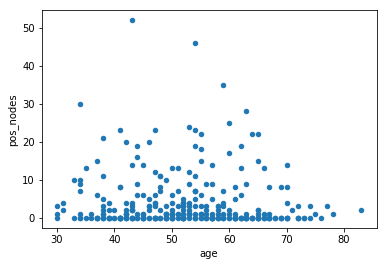

In [5]:
data.plot(kind= 'scatter',x='age', y = 'pos_nodes' )
plt.show()

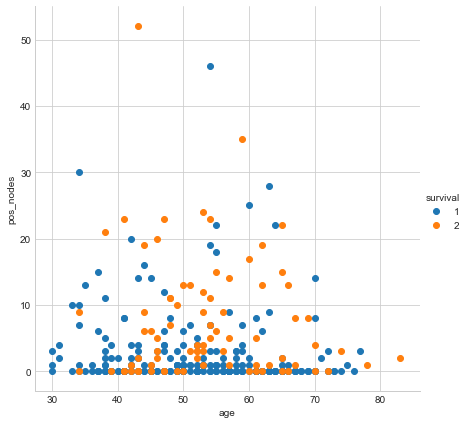

In [7]:
# 2-D Scatter plot with color-coding for surviver and non-survivers class on age and positive nodes
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='survival',size=6).map(plt.scatter,'age','pos_nodes') \
.add_legend()
plt.show()

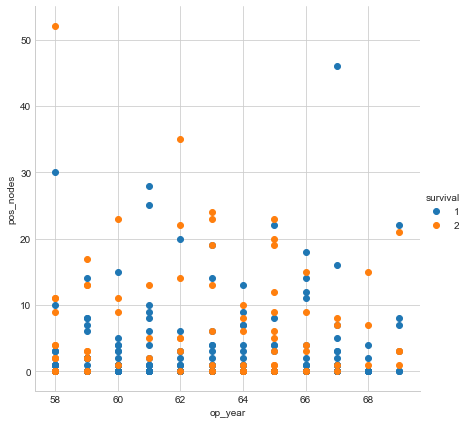

In [10]:
# 2-D Scatter plot with color-coding for surviver and non-survivers class on operation year and positive nodes
sns.set_style('whitegrid')
sns.FacetGrid(data, hue ='survival', size = 6).map(plt.scatter,'op_year','pos_nodes') \
.add_legend()
plt.show()

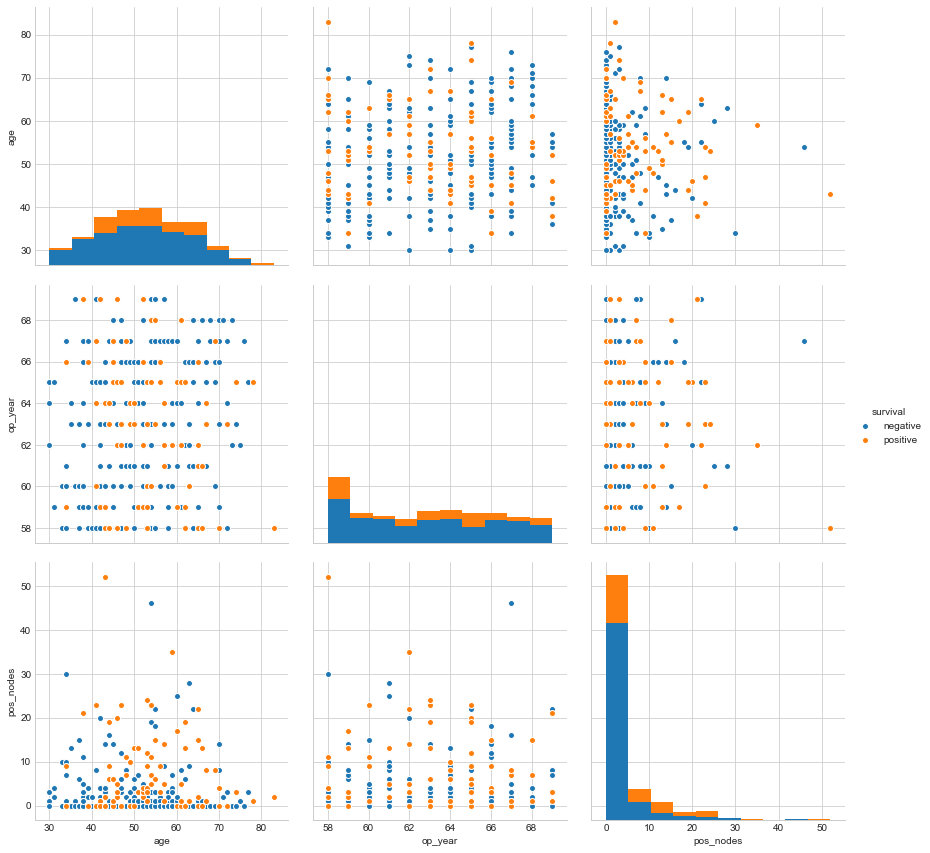

In [11]:
data['survival'] = data['survival'].apply(lambda x: 'negative' if x == 1 else 'positive')
#['age', 'op_year','pos_nodes', 'survival']
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'survival', size = 4)
plt.show()

Even here we are not able to make or seperate the data poits.

Lets try doing univariate analysys:

# Univariate analysys

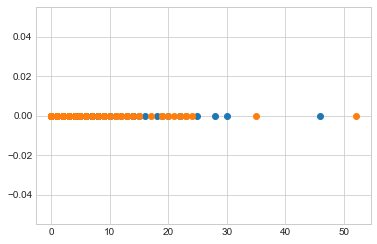

In [33]:
#separating survived and others dataset for better understanding and ease of working

data_neg = data.loc[data['survival'] == 'negative']
data_pos = data.loc[data['survival'] == 'positive']
#['age', 'op_year','pos_nodes', 'survival']
plt.plot(data_neg['pos_nodes'],np.zeros_like(data_neg['pos_nodes']), 'o')
plt.plot(data_pos['pos_nodes'],np.zeros_like(data_pos['pos_nodes']), 'o')
plt.show()

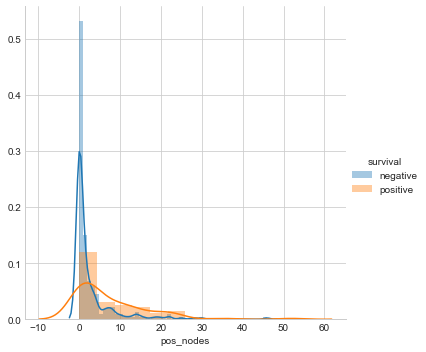

In [34]:
sns.FacetGrid(data, hue = 'survival', size =5).map(sns.distplot, 'pos_nodes') \
.add_legend()
plt.show()


In [39]:
print('Number of Patient for whom positive nodes detected is less than 2 = {}'
      .format(len(data[data['pos_nodes']<=2])))
print('Number of survived Patients for whom positive nodes detected is less than 2 = {}'
      .format(len(data_neg[data_neg['pos_nodes']<=2])))
print('Number of other Patients for whom positive nodes detected is less than 2 = {}'
      .format(len(data_pos[data_pos['pos_nodes']<=2])))

Number of Patient for whom positive nodes detected is less than 2 = 197
Number of survived Patients for whom positive nodes detected is less than 2 = 165
Number of other Patients for whom positive nodes detected is less than 2 = 32


In [42]:
#conclusion with detected positive nodes
pct_survived = 165/197*100
print(pct_survived,'% patients survived who were detected with less than or equal to 2 nodes')

83.75634517766497 % patients survived who were detected with less than or equal to 2 nodes


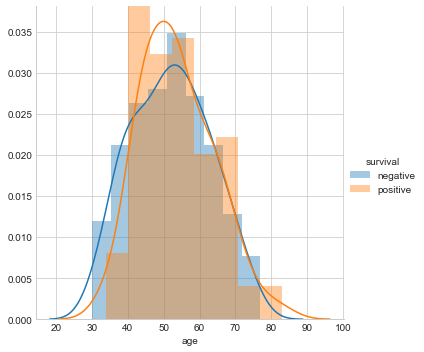

In [43]:
# Lets check the same on Age
sns.FacetGrid(data, hue = 'survival', size =5).map(sns.distplot, 'age') \
.add_legend()
plt.show()

In [46]:
print(data_neg['age'].describe())

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


In [48]:
print(data_pos['age'].describe())

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64


All the Patients whose age is less than 34 survived for more than 5 years and 
none of them survived for 5 years if their age is more then 77

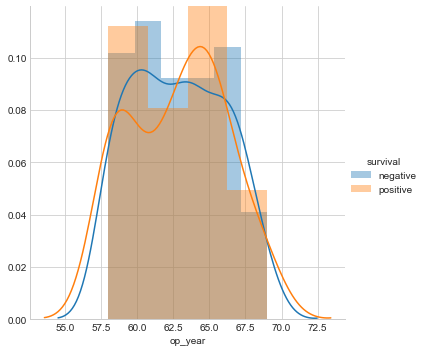

In [49]:
# Now let us check on operation year 
sns.FacetGrid(data, hue = 'survival', size =5).map(sns.distplot, 'op_year') \
.add_legend()
plt.show()


Cant draw much insights from the above plot

# Mean Variance and Standard deviation

In [50]:
import math
#for negative result
print('Avg age is:',np.mean(data_neg['age']))
print('Avg age with outlier is:',np.mean(np.append(data_neg['age'],2000)))
print('Avg no of positive nodes is:',np.mean(data_neg['pos_nodes']))
#for positive result
print('Avg age is:',np.mean(data_pos['age']))
print('Avg age with outlier is:',np.mean(np.append(data_pos['age'],2000)))
print('Avg no of positive nodes is:',np.mean(data_pos['pos_nodes']))
      
      
print('Std-dev:')
print('STD of age is:',np.std(data_neg['age']))
print('STD of age is:',np.std(data_pos['age']))
print('Std of positive nodes is:',np.std(data_neg['pos_nodes']))
print('STD of Positive nodes:',np.std(data_pos['pos_nodes']))
#Calculating Std with Variance      
var = np.var(data_neg['age'])
std = math.sqrt(var)
print('var and STD of age are:', var, std)

Avg age is: 52.01777777777778
Avg age with outlier is: 60.63716814159292
Avg no of positive nodes is: 2.7911111111111113
Avg age is: 53.67901234567901
Avg age with outlier is: 77.41463414634147
Avg no of positive nodes is: 7.45679012345679
Std-dev:
STD of age is: 10.98765547510051
STD of age is: 10.10418219303131
Std of positive nodes is: 5.857258449412131
STD of Positive nodes: 9.128776076761632
var and STD of age are: 120.72857283950623 10.98765547510051


# Median, Quantiles, Percentiles and Median average deviation

In [51]:
#Median, Quantiles, Percentiles and MAD
#for negative result
print('Avg age is:',np.median(data_neg['age']))
print('Avg age with outlier is:',np.median(np.append(data_neg['age'],2000)))
print('Avg no of positive nodes is:',np.median(data_neg['pos_nodes']))
#for positive result
print('Avg age is:',np.median(data_pos['age']))
print('Avg age with outlier is:',np.median(np.append(data_pos['age'],2000)))
print('Avg no of positive nodes is:',np.median(data_pos['pos_nodes']))
      


print('Quantiles')
print(np.percentile(data_neg['age'],np.arange(0, 100, 25)))
print(np.percentile(data_pos['age'],np.arange(0, 100, 25)))
print(np.percentile(data_neg['pos_nodes'], np.arange(0, 100, 25)))
print(np.percentile(data_pos['pos_nodes'], np.arange(0, 100, 25)))


from statsmodels import robust
print ('Median Absolute Deviation')
print(robust.mad(data_neg['age']))
print(robust.mad(data_pos['age']))
print(robust.mad(data_neg['pos_nodes']))
print(robust.mad(data_pos['pos_nodes']))

Avg age is: 52.0
Avg age with outlier is: 52.0
Avg no of positive nodes is: 0.0
Avg age is: 53.0
Avg age with outlier is: 53.0
Avg no of positive nodes is: 4.0
Quantiles
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
Median Absolute Deviation
13.343419966550417
11.860817748044816
0.0
5.930408874022408


# Box plots

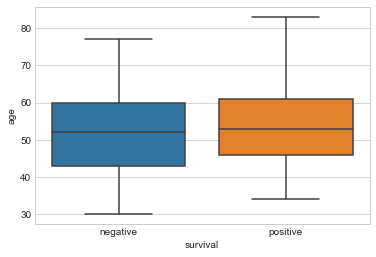

In [52]:
sns.boxplot(x='survival',y='age', data=data)
plt.show()

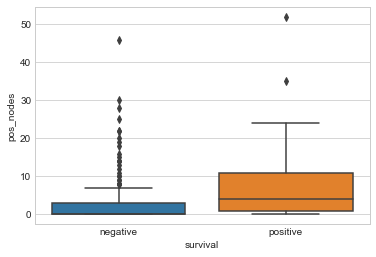

In [53]:
sns.boxplot(x='survival',y='pos_nodes', data=data)
plt.show()

# Violin plots

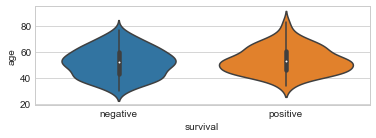

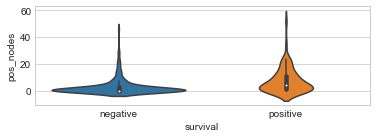

In [54]:
plt.figure(1)
plt.subplot(211)
sns.violinplot(x='survival',y='age', data=data)
plt.show()
plt.subplot(212)
sns.violinplot(x='survival',y='pos_nodes', data=data)
plt.show()

# contour plot

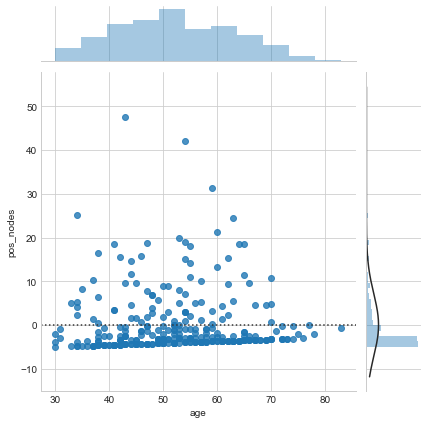

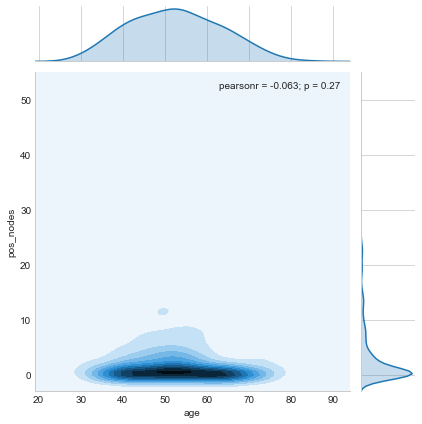

In [55]:
sns.jointplot(y='pos_nodes',x='age', data=data, kind = 'resid')
plt.show()

sns.jointplot(y='pos_nodes',x='age', data=data, kind = 'kde')
plt.show()


# Conclusion

All the Patients whose age is less than 34 survived for more than 5 years and 
none of them survived for 5 years if their age is more then 77

Almost 84% patients survived who were detected with less than or equal to 2 nodes

It is difficult to predict exactly if a person will survive for more than 5 years post operation, with the details provided using the visual method. So Machine learning algorithms would be handy and can predict more accurately than visual methods.